In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Estilo visual para los gráficos
plt.style.use('seaborn-v0_8')

# Ruta base donde están los archivos
base = "/Users/macos/Downloads/BASE DE DATOS/"
output_dir = base + "salidas"
os.makedirs(output_dir, exist_ok=True)

In [6]:
# Cargar bases de datos
clientes = pd.read_excel(base + "Clientes.xlsx")
ventas = pd.read_excel(base + "Ventas.xlsx")
detalle = pd.read_excel(base + "Detalle_ventas.xlsx")


In [7]:
# Relacionar ventas con ciudad del cliente
ventas_ciudad = ventas.merge(clientes[['id_cliente', 'ciudad']], on='id_cliente', how='left')

# Relacionar detalle con ciudad
detalle_ciudad = detalle.merge(ventas_ciudad[['id_venta', 'ciudad']], on='id_venta', how='left')


In [8]:
# Agrupar por ciudad y calcular métricas clave
agrupado = detalle_ciudad.groupby('ciudad').agg(
    total_vendido=('importe', 'sum'),
    transacciones=('id_venta', 'nunique'),
    ticket_promedio=('importe', 'mean')
).reset_index().sort_values(by='total_vendido', ascending=False)

# Ver primeras filas
agrupado.head()

,ciudad,total_vendido,transacciones,ticket_promedio
4,Rio Cuarto,792203,37,7617.336538
0,Alta Gracia,481504,25,7407.753846
2,Cordoba,481482,24,7407.415385
1,Carlos Paz,353852,13,8630.536585
5,Villa Maria,313350,11,9216.176471


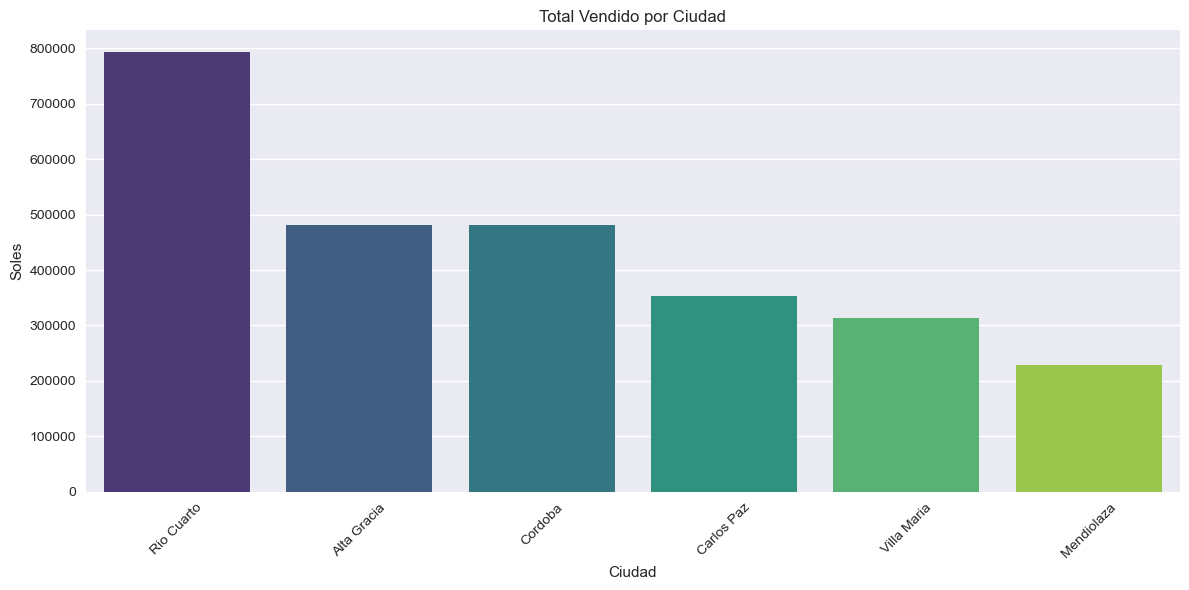

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado, x='ciudad', y='total_vendido', hue='ciudad', palette='viridis', legend=False)
plt.title("Total Vendido por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Soles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/total_vendido_por_ciudad.png")
plt.show()


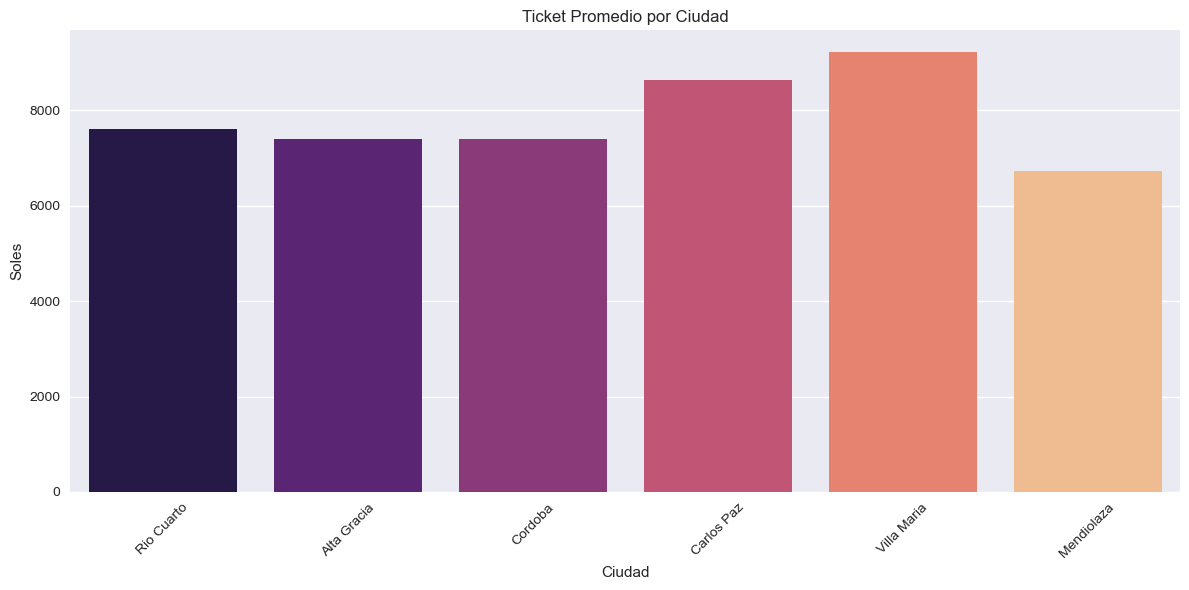

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado, x='ciudad', y='ticket_promedio', hue='ciudad', palette='magma', legend=False)
plt.title("Ticket Promedio por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Soles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/ticket_promedio_por_ciudad.png")
plt.show()


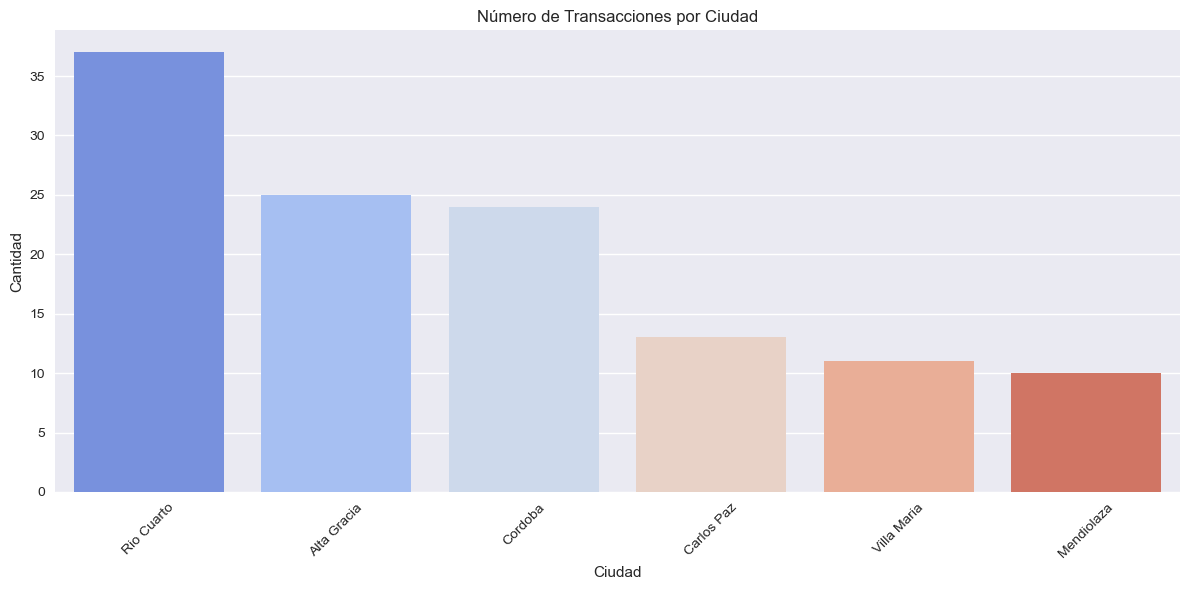

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado, x='ciudad', y='transacciones', hue='ciudad', palette='coolwarm', legend=False)
plt.title("Número de Transacciones por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/transacciones_por_ciudad.png")
plt.show()
